# Exploratory Data Analysis of Sleep Health and Lifestyle Data

### Introduction

Welcome to this notebook, a showcase of versatile Exploratory Data Analysis (EDA) techniques applied to sleep health and lifestyle data. While the dataset serves as our case study, the methods and principles demonstrated here are universal tools in data science, applicable across a wide range of topics and industries.

Through this notebook, we will cover:

**Data Collection**: An overview of the dataset structure and contents.<br>
**Data Cleaning** and **Visualization**: Identifying and addressing missing or duplicate data, and creating visualizations for a better understanding of the data distribution and potential relationships.<br>
**Feature Engineering**: Enhancing our dataset with new informative features derived from existing data.<br>
**Identifying outliers** Identify dtaa points that significantly deviate from the majority of the data. <br>
**Correlation Analysis**: Investigating the relationships between different variables to identify patterns and insights.<br>

The dataset (source:https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data) comprises: <br>
Person ID: An identifier for each individual.<br>
Gender: The gender of the person (Male/Female).<br>
Age: The age of the person in years.<br>
Occupation: The occupation or profession of the person.<br>
Sleep Duration (hours): The number of hours the person sleeps per day.<br>
Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.<br>
Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.<br>
Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.<br>
BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).<br>
Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.<br>
Heart Rate (bpm): The resting heart rate of the person in beats per minute.<br>
Daily Steps: The number of steps the person takes per day.<br>
Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).



In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection


In [148]:
df = pd.read_csv("Data/Sleep_health_and_lifestyle_dataset.csv")

In [149]:
df.shape #number of rows and columns

(374, 13)

In [150]:
df.sample(5) #random 5 rows.

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
294,295,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
297,298,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
79,80,Male,33,Doctor,6.0,6,30,8,Normal,125/80,72,5000,NaN
162,163,Female,40,Accountant,7.2,8,55,6,Normal Weight,119/77,73,7300,NaN
335,336,Female,54,Engineer,8.4,9,30,3,Normal,125/80,65,5000,NaN


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [152]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### Data Cleaning and Visualisation

#### Check for duplicate data

In [153]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = df[df.duplicated()]
display(duplicate_rows)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder


- No duplicates are found

In [154]:
# remove Person ID as it does not give you anything valuable for the analysis
df.drop(columns= 'Person ID', inplace=True)

#### Handling missing values

some common ways to handle missing values are deletion and imputation. <br>
In our case, we will use Categorical Imputation to replace missiong values in 'Sleep Disorder' column with the category 'None'.

In [155]:
df.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [156]:
# Encoding missing values in 'Sleep Disorder' to 'None'
df['Sleep Disorder'].fillna('None', inplace=True)

In [157]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

### Categorical variables

In [158]:
categorical_cols = df.select_dtypes(exclude=['number']).columns
print("Categorical columns: "+str(categorical_cols))

Categorical columns: Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'Sleep Disorder'],
      dtype='object')


In [159]:
for col in categorical_cols:
    print(col+":")
    print(df[col].unique())

Gender:
['Male' 'Female']
Occupation:
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category:
['Overweight' 'Normal' 'Obese' 'Normal Weight']
Blood Pressure:
['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Sleep Disorder:
['None' 'Sleep Apnea' 'Insomnia']


#### Feature Engineering

In [160]:
#split the 'Blood Pressure' column into two separate columns, 'Systolic' and 'Diastolic'
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df.drop(['Blood Pressure'], axis=1, inplace=True)

categorical_cols = df.select_dtypes(exclude=['number']).columns
print("Categorical columns: "+str(categorical_cols))

Categorical columns: Index(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], dtype='object')


In [161]:
# BMI Category has 'Normal' and 'Normal Weight' which is the same category
df['BMI Category'].replace({'Normal Weight':'Normal'}, inplace=True)

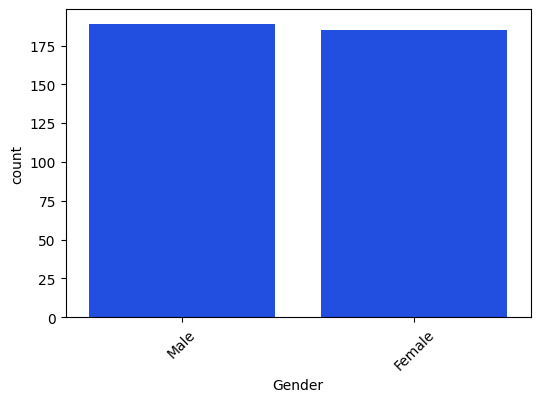

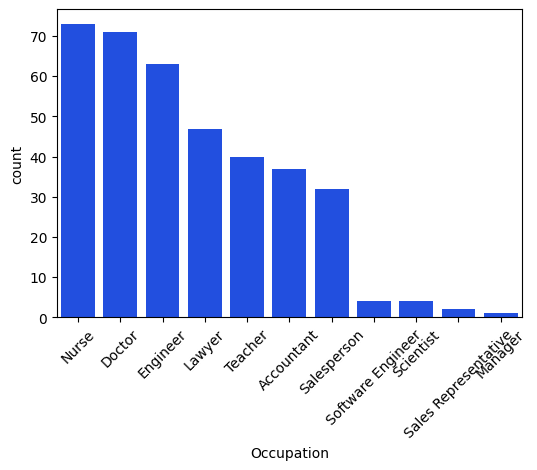

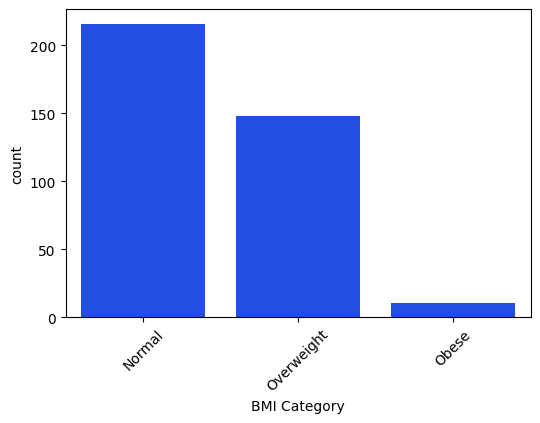

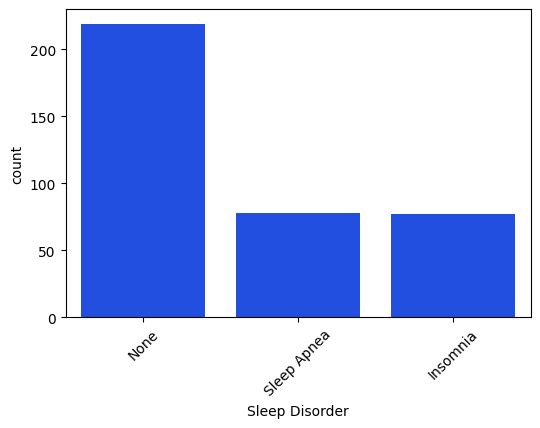

In [162]:
# #visualise the plots one by one
# for col in categorical_cols:
#     plt.subplots(figsize=(6, 4))
#     sns.countplot(x=col, data=df,  order = df[col].value_counts().index)
#     plt.xticks(rotation=45)
#     plt.show()

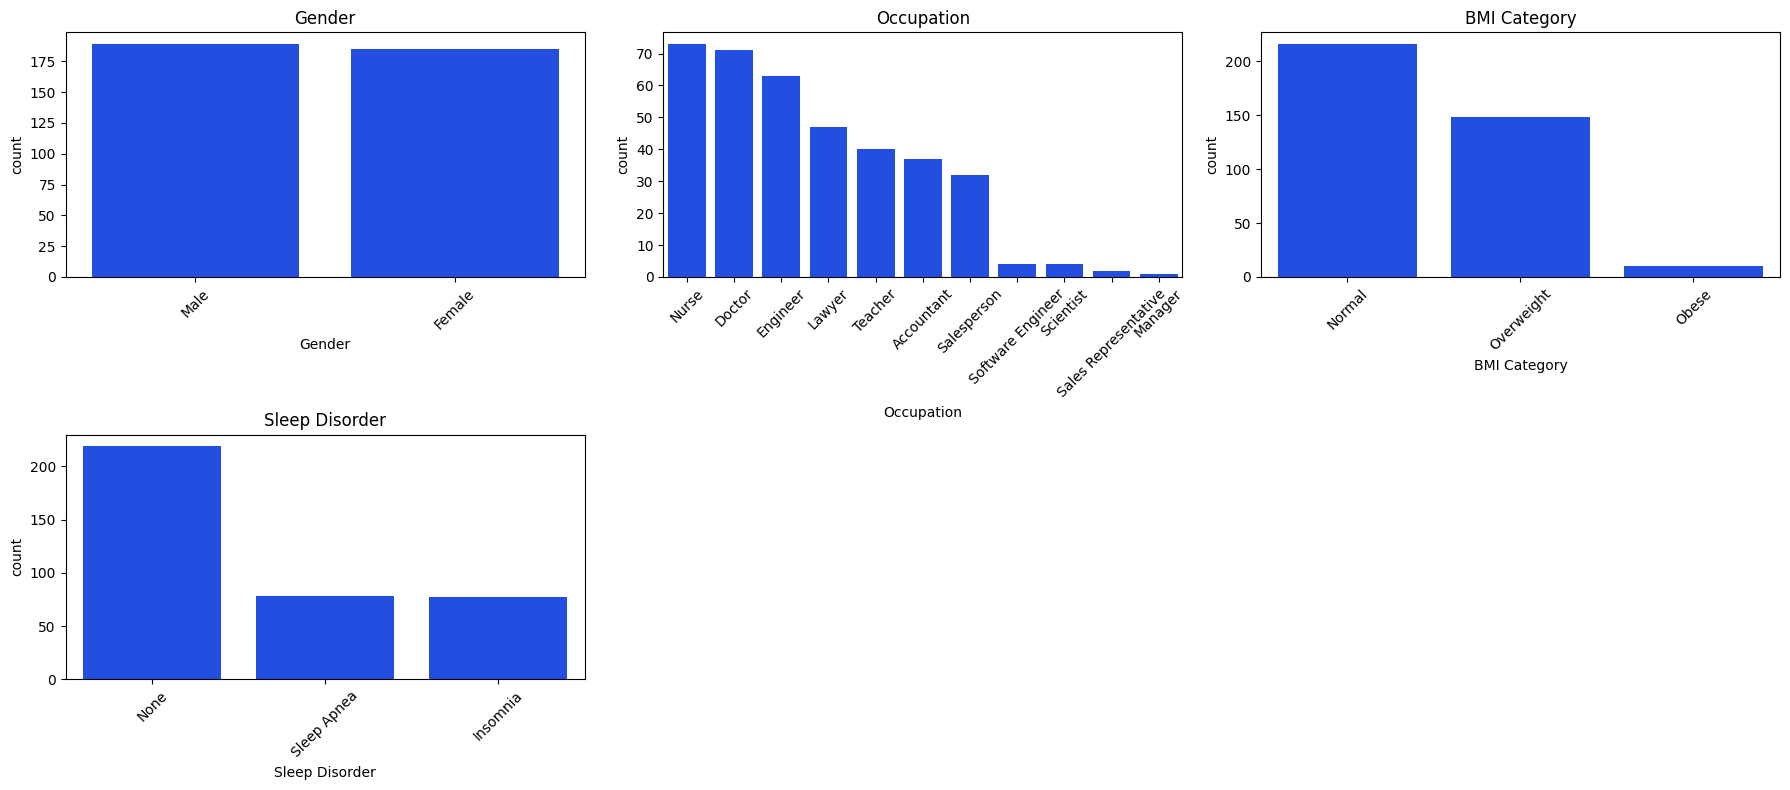

In [182]:
#Visualise the plots all together in one plot
n_cols = 3 # number of plots in one row, adjust as needed. 
n_rows = len(categorical_cols) // n_cols + (len(categorical_cols) % n_cols > 0)

plt.figure(figsize=(n_cols * 6, n_rows * 4))

# Create subplots in a loop
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(col)

# Adjust the layout
plt.tight_layout()
plt.show()

### Continuous Variables

In [163]:
# Separate the numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
print("Numerical columns: "+str(numerical_cols))

Numerical columns: Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic'],
      dtype='object')


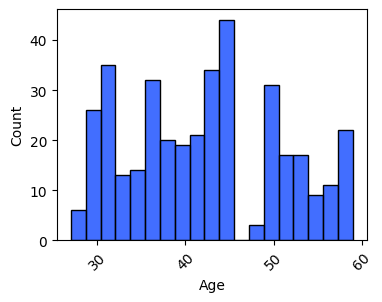

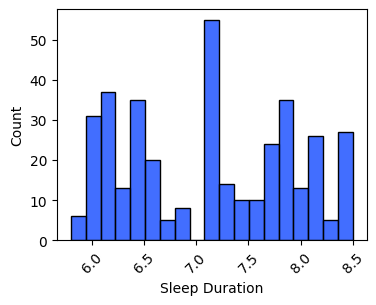

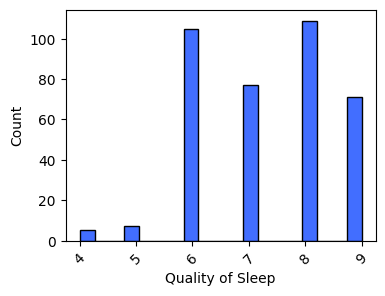

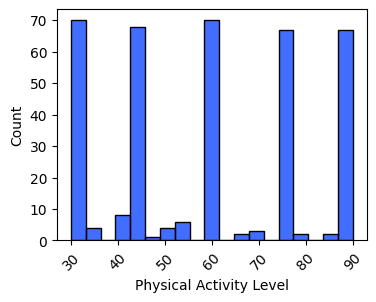

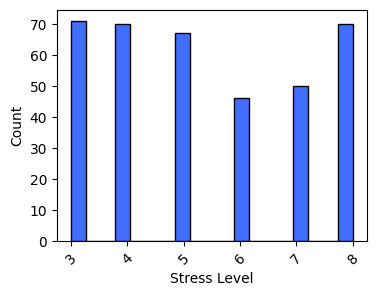

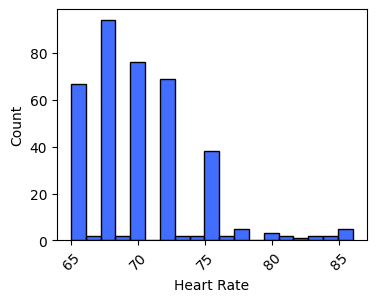

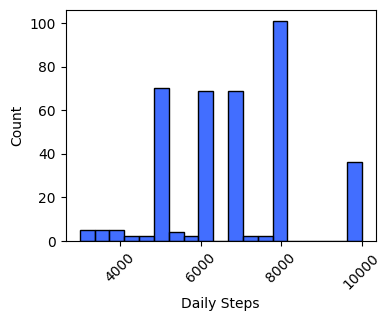

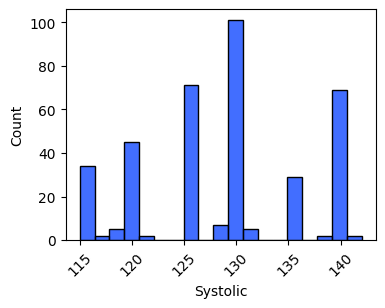

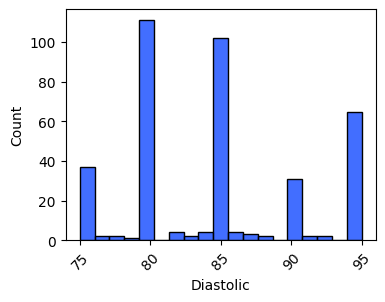

In [181]:
# #visualise the plots one by one
# sns.set_palette("bright")

# for col in numerical_cols:
#     plt.subplots(figsize=(4, 3))
#     # Determine the number of bins
#     num_bins = int(np.sqrt(len(df[col])))
#     sns.histplot(x=col, data=df, bins = num_bins)
#     plt.xticks(rotation=45)
#     plt.show()

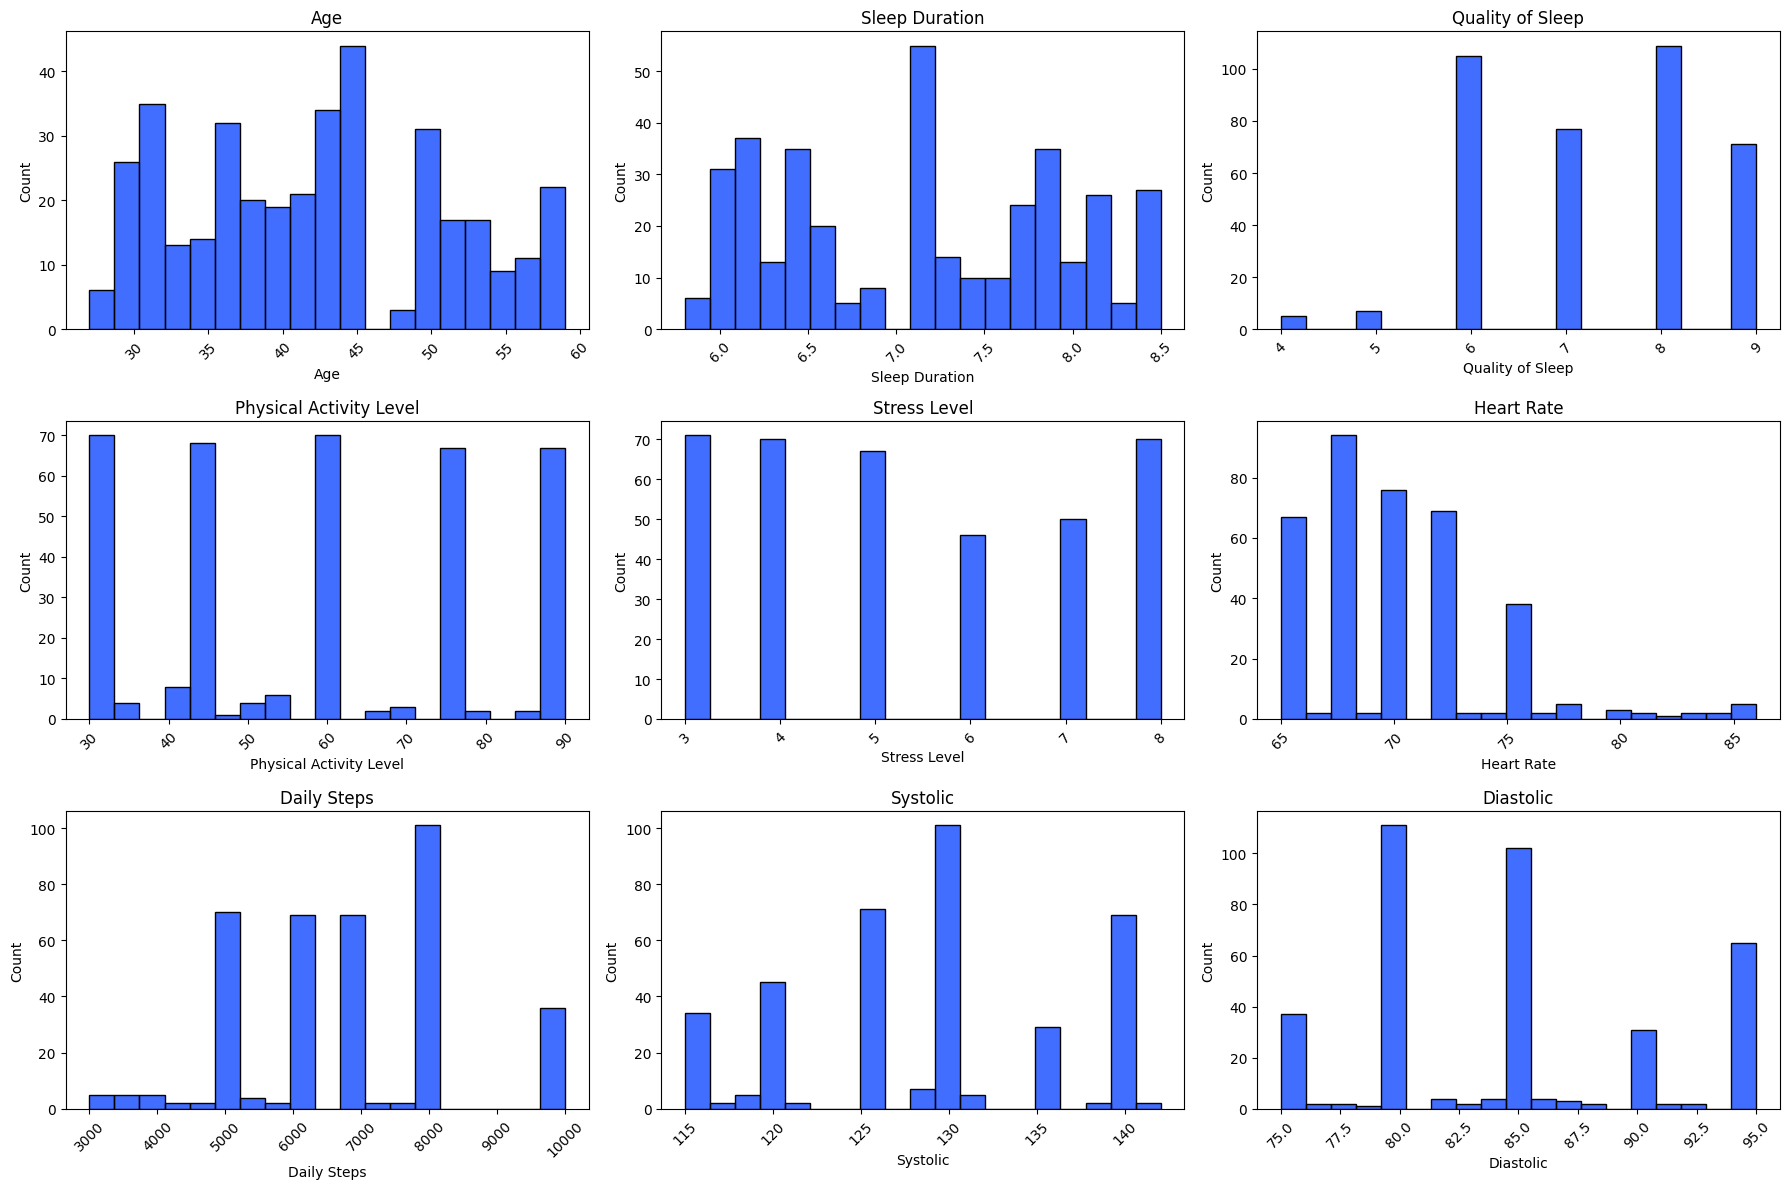

In [178]:
#Visualise the plots all together in one plot
n_cols = 3 # number of plots in one row, adjust as needed. 
n_rows = len(numerical_cols) // n_cols + (len(numerical_cols) % n_cols > 0)

plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    
    # Determine the number of bins
    num_bins = int(np.sqrt(len(df[col])))
    
    sns.histplot(x=col, data=df, bins=num_bins)
    plt.xticks(rotation=45)
    plt.title(col)

plt.tight_layout()
plt.show()

### Identify outliers

There are many methods to detect outliers such as:
- Interquartile range method
- Boxplot
- Scatter plot
- Statisticla tests

In our case, we will use boxplot where the points that lie outside of the whiskers can be considered outliers.

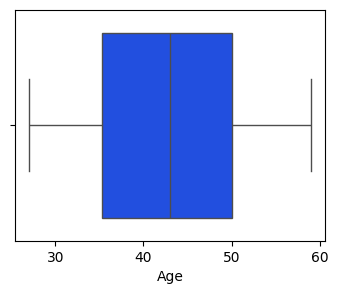

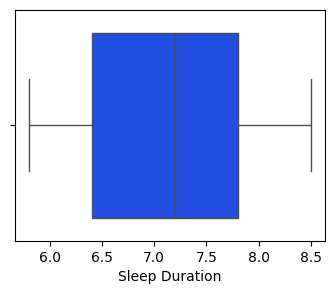

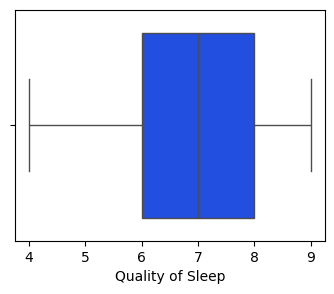

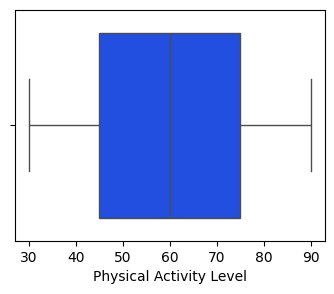

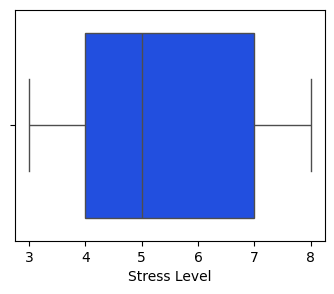

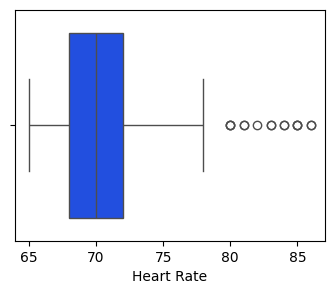

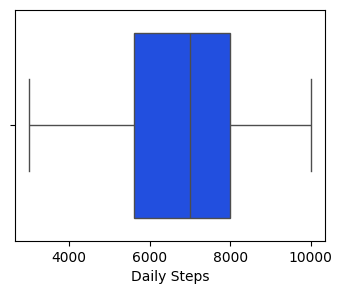

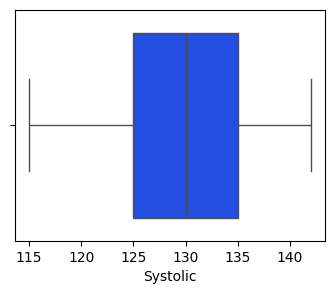

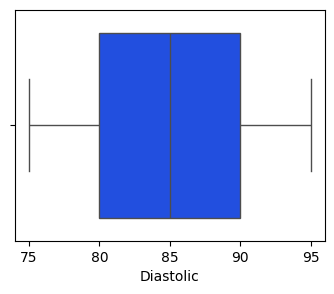

In [171]:
for col in numerical_cols:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=df[col])
    plt.show()

- Outliers are identified in the Heart Rate column. The presence of outliers could be due to many reasons such as:
    - Natural Variation : Some people may naturally have higher heart rate due to many factors such as fitness level.
    - Measurement and entry error: error when measuring the heart rate or when entering the data (mistyping).

After doing a quick search on google, most adults have their resting heart rate within 60 to 100 beats per minute (https://www.bhf.org.uk/informationsupport/heart-matters-magazine/medical/ask-the-experts/pulse-rate#:~:text=A%20normal%20resting%20heart%20rate,vary%20from%20minute%20to%20minute.). Our outliers were in the range of ~80 to ~85. Therefore, I will assume those outliers are genuine observation that can provide valuable insight. I will not remove or change them.

## Correlation between variables

Using healtmap to visualise the correlation coefficients between a set of variables. <br>
1 indicates a perfect positive correlation. -1 indicates a perfect negative correlation. 0 indicates no correlation.

In [128]:
def corr_matrix(df):
    # Compute the correlation matrix
    correlation_matrix = df.corr()

    # Generate a mask for the bottom half of the correlation matrix
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Create a heatmap with the mask and color scale
    plt.figure(figsize=(6, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, square=True, cbar=True)
    plt.title('Correlation Plot')
    plt.show()

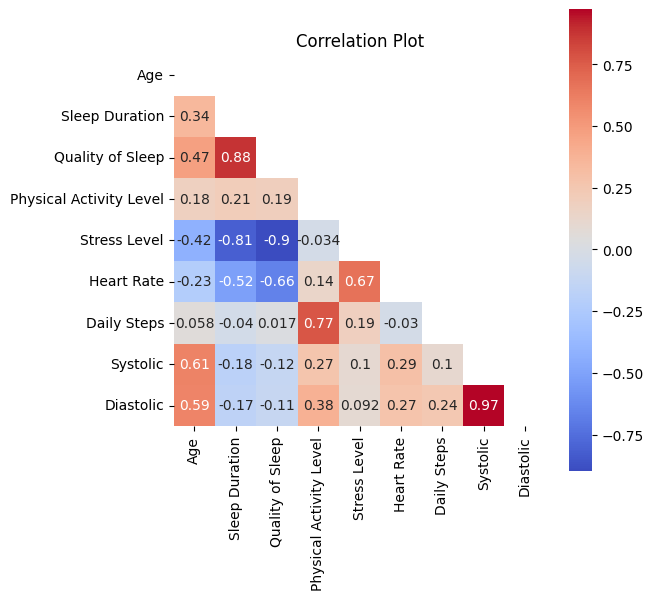

In [129]:
corr_matrix(df[numerical_cols])

- Sleep Duration has a positive correlation with Quality of Sleep (0.883213), indicating that longer sleep durations are associated with better sleep quality. It also has a negative correlation with Stress Level (-0.811023), suggesting that longer sleep durations are associated with lower stress levels.
- Physical Activity Level has a positive correlation with Daily Steps (0.772723), indicating that individuals with higher physical activity levels tend to take more daily steps.
- Stress Level has a strong negative correlation with both Sleep Duration (-0.811023) and Quality of Sleep (-0.898752), suggesting that higher stress levels are associated with shorter sleep durations and poorer sleep quality.
- The correlation between Systolic and Diastolic blood pressure is very strong (0.97). When one increases, the other tends to increase as well, and when one decreases, the other tends to decrease. This is a common observation in blood pressure measurements, as both Systolic and Diastolic blood pressures are components of overall blood pressure. This raises concerns about **multicollinearity**.

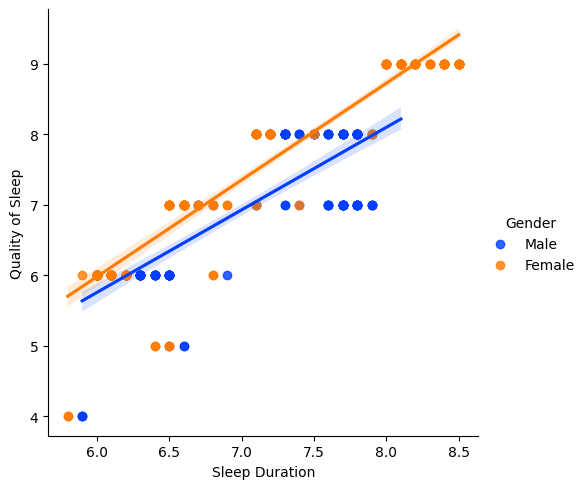

In [136]:
sns.lmplot(x='Sleep Duration', y='Quality of Sleep', data=df, hue='Gender',);

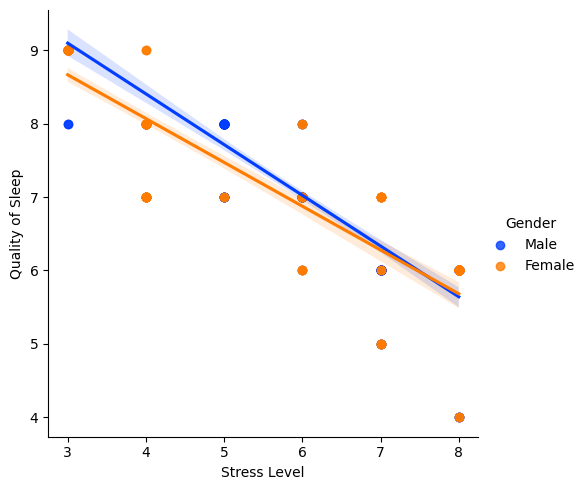

In [137]:
sns.lmplot(x='Stress Level', y='Quality of Sleep', data=df, hue='Gender',);

#### Systolic and Diastolic blood pressure are very strongly correlated. It raises concerns about multicollinearity in statistical models.
It might be more appropriate to use only one of them or to create a composite index that captures overall blood pressure, if both pieces of information are necessary for the model.<br>
In our case, we will remove one. 

In [134]:
df.drop(columns='Diastolic', inplace=True)

## Conclusion

We have covered a range of EDA techniques from data cleaning to correlation analysis. 
This notebook serves as a foundational guide to EDA - a starting point for those new to the field and a reference for seasoned analysts. 